In [2]:
import pandas as pd

data_1910 = pd.read_parquet("../data/modelling/works_modelling_1910s.parquet")
data_1920 = pd.read_parquet("../data/modelling/works_modelling_1920s.parquet")
data_1930 = pd.read_parquet("../data/modelling/works_modelling_1930s.parquet")
data_1940 = pd.read_parquet("../data/modelling/works_modelling_1940s.parquet")
data_1950 = pd.read_parquet("../data/modelling/works_modelling_1950s.parquet")
data_1960 = pd.read_parquet("../data/modelling/works_modelling_1960s.parquet")
data_1970 = pd.read_parquet("../data/modelling/works_modelling_1970s.parquet")
data_1980 = pd.read_parquet("../data/modelling/works_modelling_1980s.parquet")
data_1990 = pd.read_parquet("../data/modelling/works_modelling_1990s.parquet")
data_2000 = pd.read_parquet("../data/modelling/works_modelling_2000s.parquet")
data_2010 = pd.read_parquet("../data/modelling/works_modelling_2010s.parquet")
data_2020 = pd.read_parquet("../data/modelling/works_modelling_2020s.parquet")

all_top10 = {}


# 1910s

In [3]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = data_1910.copy()


topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)




Train R² : 0.3919
Test  R² : -0.3073
Test  RMSE: 1.8073
topic_Beetle Biology and Toxicology Studies             15.281992
topic_Food Allergy and Anaphylaxis Research             12.430426
topic_Marine Toxins and Detection Methods               12.131370
topic_Inorganic and Organometallic Chemistry             8.636523
topic_Trauma Hemostasis, Coagulopathy, Resuscitation     7.566393
                                                          ...    
topic_Migraine and Headache Studies                     -0.327647
topic_Crystal structures of chemical compounds          -0.327647
topic_Advanced Database Systems and Queries             -0.327647
topic_Bone health and treatments                        -0.327647
topic_African Botany and Ecology Studies                -0.327647
Length: 220, dtype: float64


In [ ]:
topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")


coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)






Train R² : 0.2534
Test  R² : -0.2850
Test  RMSE: 1.7918
topic_3     7.664346
topic_34    6.484136
topic_63    5.850012
topic_80    4.093925
topic_8     1.978265
              ...   
topic_18   -1.363103
topic_79   -1.363103
topic_30   -1.363103
topic_47   -1.363103
topic_36   -1.363103
Length: 68, dtype: float64


In [5]:

import statsmodels.api as sm


topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic",drop_first=True)

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)


print(results_df)

print(model_sm.summary())

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1910"] = top10





                                                         coef          pval
topic_Beetle Biology and Toxicology Studies         15.307511  4.044910e-09
topic_Marine Toxins and Detection Methods           12.156889  2.534058e-06
topic_Food Allergy and Anaphylaxis Research         10.795240  3.363685e-19
topic_Inorganic and Organometallic Chemistry         8.662042  7.422374e-04
topic_Trauma Hemostasis, Coagulopathy, Resuscit...   7.591913  3.064957e-03
...                                                       ...           ...
topic_Immunotoxicology and immune responses         -0.302127  9.057243e-01
topic_Child Nutrition and Water Access              -0.302127  9.057243e-01
topic_Families in Therapy and Culture               -0.302127  9.057243e-01
topic_Aortic aneurysm repair treatments             -0.302127  9.057243e-01
topic_Cardiac Ischemia and Reperfusion              -0.302127  9.057243e-01

[220 rows x 2 columns]
                            OLS Regression Results              

In [6]:

topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)


print(results_df)




              coef          pval
topic_3   7.729360  5.049574e-10
topic_63  5.915025  1.491301e-02
topic_34  5.460450  1.037116e-11
topic_80  2.842272  2.039278e-02
topic_14  2.623734  2.792307e-01
...            ...           ...
topic_18 -1.298090  3.566537e-01
topic_79 -1.298090  5.922741e-01
topic_44 -1.298090  4.502597e-01
topic_43 -1.298090  4.502597e-01
topic_42 -1.298090  5.922741e-01

[69 rows x 2 columns]


# 1920s

In [7]:
df = data_1920.copy()

topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)

Train R² : 0.4361
Test  R² : 0.0690
Test  RMSE: 2.5164
topic_Infant Health and Development                         15.825467
topic_Neurological Complications and Syndromes              15.263088
topic_Neuroscience Education and Cognitive Function         14.732366
topic_Neurotransmitter Receptor Influence on Behavior        7.801754
topic_Alcohol Consumption and Health Effects                 7.659989
                                                              ...    
topic_Microbial bioremediation and biosurfactants           -0.165483
topic_Botulinum Toxin and Related Neurological Disorders    -0.165483
topic_Phytochemistry Medicinal Plant Applications           -0.165483
topic_Blood properties and coagulation                      -0.165483
topic_Plant Physiology and Cultivation Studies              -0.165483
Length: 304, dtype: float64


In [8]:


topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)



Train R² : 0.1944
Test  R² : 0.0819
Test  RMSE: 2.4989
topic_16    5.980920
topic_76    4.318492
topic_70    4.255145
topic_54    2.482599
topic_6     2.337205
              ...   
topic_18   -1.231687
topic_62   -1.231687
topic_84   -1.231687
topic_68   -1.231687
topic_58   -1.231687
Length: 85, dtype: float64


In [9]:
topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1920"] = top10

                                                         coef          pval
topic_Infant Health and Development                 15.837754  1.362822e-13
topic_Neurological Complications and Syndromes      15.275375  8.936058e-13
topic_Neuroscience Education and Cognitive Func...  14.744653  5.002825e-12
topic_Neurotransmitter Receptor Influence on Be...   8.600361  5.359773e-22
topic_Contact Dermatitis and Allergies               7.032288  8.565265e-04
...                                                       ...           ...
topic_Essential Oils and Antimicrobial Activity     -0.153196  9.418899e-01
topic_Medicine and Dermatology Studies History      -0.153196  9.418899e-01
topic_Pharmaceutical Economics and Policy           -0.153196  9.418899e-01
topic_Axon Guidance and Neuronal Signaling          -0.153196  9.418899e-01
topic_Abdominal vascular conditions and treatments  -0.153196  9.418899e-01

[305 rows x 2 columns]
                            OLS Regression Results              

In [10]:
topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)


model_sm = sm.OLS(y, X_sm).fit()


results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)

              coef          pval
topic_16  4.393649  3.585945e-05
topic_76  4.218762  4.534382e-02
topic_70  4.155414  6.843013e-04
topic_85  3.267049  2.869987e-02
topic_6   2.989374  6.755175e-09
...            ...           ...
topic_84 -1.331418  5.272360e-01
topic_97 -1.331418  5.272360e-01
topic_93 -1.331418  5.272360e-01
topic_61 -1.331418  5.272360e-01
topic_62 -1.331418  1.605886e-01

[86 rows x 2 columns]


# 1930s

In [11]:
df = data_1930.copy()

topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)

Train R² : 0.3669
Test  R² : -1.5037
Test  RMSE: 2.4597
topic_Migraine and Headache Studies                   20.583848
topic_Cardiomyopathy and Myosin Studies               20.341910
topic_Peroxisome Proliferator-Activated Receptors     11.523584
topic_Selenium in Biological Systems                   6.677672
topic_Radioactivity and Radon Measurements             6.672076
                                                        ...    
topic_Biomedical and Engineering Education            -0.156376
topic_Respiratory Support and Mechanisms              -0.156376
topic_Retinoids in leukemia and cellular processes    -0.156376
topic_Neurological diseases and metabolism            -0.156376
topic_ATP Synthase and ATPases Research               -0.156376
Length: 349, dtype: float64


In [12]:


topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)



Train R² : 0.1541
Test  R² : -0.0984
Test  RMSE: 1.6292
topic_72    5.627458
topic_84    4.689874
topic_22    2.795761
topic_44    2.563406
topic_51    2.498590
              ...   
topic_0    -1.206589
topic_75   -1.206589
topic_30   -1.206589
topic_24   -1.206589
topic_35   -1.206589
Length: 97, dtype: float64


In [13]:
topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1930"] = top10


                                                         coef          pval
topic_Cardiomyopathy and Myosin Studies             20.343765  2.540764e-22
topic_Migraine and Headache Studies                  7.014065  4.662258e-09
topic_Selenium in Biological Systems                 6.679527  5.654523e-15
topic_Radioactivity and Radon Measurements           6.673931  1.177431e-03
topic_Reproductive biology and impacts on aquat...   6.104894  2.990326e-03
...                                                       ...           ...
topic_Pathogenesis and Treatment of Hiccups         -0.154521  9.399928e-01
topic_Regulation of Appetite and Obesity            -0.154521  9.399928e-01
topic_Biomedical Research and Pathophysiology       -0.154521  9.399928e-01
topic_Vestibular and auditory disorders             -0.154521  9.399928e-01
topic_Biopolymer Synthesis and Applications         -0.154521  9.399928e-01

[350 rows x 2 columns]
                            OLS Regression Results              

In [14]:
topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)


model_sm = sm.OLS(y, X_sm).fit()


results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)

              coef          pval
topic_72  5.723247  1.095695e-11
topic_84  4.198963  4.760999e-06
topic_51  2.594379  7.190817e-02
topic_44  2.376742  5.338635e-04
topic_14  1.712435  4.067575e-03
...            ...           ...
topic_75 -1.110801  5.852063e-01
topic_24 -1.110801  5.852063e-01
topic_35 -1.110801  5.852063e-01
topic_30 -1.110801  2.735498e-02
topic_18 -1.110801  6.217199e-02

[98 rows x 2 columns]


# 1940s

In [15]:
df = data_1940.copy()

topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)

Train R² : 0.2217
Test  R² : -0.2084
Test  RMSE: 2.4562
topic_Graphite nuclear technology, radiation studies    53.296916
topic_Carcinogens and Genotoxicity Assessment           12.614542
topic_Nicotinic Acetylcholine Receptors Study           11.628276
topic_Melamine detection and toxicity                    9.523346
topic_Magnetic and Electromagnetic Effects               6.126924
                                                          ...    
topic_Hormonal Regulation and Hypertension              -0.070833
topic_Antioxidant Activity and Oxidative Stress         -0.070833
topic_Embedded Systems Design Techniques                -0.070833
topic_Neurology and Historical Studies                  -0.070833
topic_Cholesterol and Lipid Metabolism                  -0.070833
Length: 427, dtype: float64


In [16]:


topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)



Train R² : 0.0809
Test  R² : -0.1844
Test  RMSE: 2.4316
topic_42    18.832241
topic_46    10.754517
topic_85     5.047770
topic_9      2.293698
topic_14     1.754175
              ...    
topic_30    -1.149987
topic_62    -1.149987
topic_76    -1.149987
topic_0     -1.149987
topic_63    -1.149987
Length: 98, dtype: float64


In [17]:
topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1940"] = top10


                                                         coef          pval
topic_Graphite nuclear technology, radiation st...  53.289134  1.568620e-57
topic_Carcinogens and Genotoxicity Assessment       12.606760  2.162342e-10
topic_Food Allergy and Anaphylaxis Research         11.260670  4.062245e-02
topic_Nicotinic Acetylcholine Receptors Study        9.971880  5.361165e-11
topic_Melamine detection and toxicity                9.515564  8.355248e-02
...                                                       ...           ...
topic_Vitamin D Research Studies                    -0.078616  9.885875e-01
topic_Phytochemistry and Bioactive Compounds        -0.078616  9.803172e-01
topic_Medical and Biological Ozone Research         -0.078616  9.885875e-01
topic_Veterinary Orthopedics and Neurology          -0.078616  9.885875e-01
topic_Food Industry and Aquatic Biology             -0.078616  9.885875e-01

[428 rows x 2 columns]
                            OLS Regression Results              

In [18]:
topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)


model_sm = sm.OLS(y, X_sm).fit()


results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)

               coef          pval
topic_42  18.928808  6.892379e-23
topic_46   8.255417  4.214417e-06
topic_85   2.214872  5.564872e-01
topic_14   1.877547  2.272021e-01
topic_82   1.588455  7.652739e-01
...             ...           ...
topic_0   -1.053421  2.043239e-02
topic_63  -1.053421  7.322125e-01
topic_30  -1.053421  6.027921e-01
topic_76  -1.053421  7.797057e-01
topic_62  -1.053421  5.560140e-01

[99 rows x 2 columns]


# 1950s

In [19]:
df = data_1950.copy()

topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)

Train R² : 0.1913
Test  R² : -0.0471
Test  RMSE: 4.5838
topic_Neonatal Respiratory Health Research           13.473455
topic_Neurological and metabolic disorders           10.016349
topic_History and advancements in chemistry           9.995717
topic_GABA and Rice Research                          7.586695
topic_Chemical Reactions and Mechanisms               7.271272
                                                       ...    
topic_Cerebrovascular and Carotid Artery Diseases    -0.157564
topic_Cannabis and Cannabinoid Research              -0.157564
topic_Veterinary Orthopedics and Neurology           -0.157564
topic_Nuts composition and effects                   -0.157564
topic_Atomic and Molecular Physics                   -0.157564
Length: 459, dtype: float64


In [20]:


topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)



Train R² : 0.0807
Test  R² : -0.0087
Test  RMSE: 4.4990
topic_100    7.912022
topic_86     6.979437
topic_29     2.782946
topic_11     2.372093
topic_85     2.189785
               ...   
topic_81    -1.153363
topic_30    -1.167855
topic_92    -1.167855
topic_18    -1.167855
topic_0     -1.167855
Length: 94, dtype: float64


In [21]:
topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1950"] = top10


                                                     coef          pval
topic_Nausea and vomiting management            21.456988  3.061354e-12
topic_Inhalation and Respiratory Drug Delivery  20.151633  3.895263e-29
topic_Neonatal Respiratory Health Research      13.496235  1.063304e-05
topic_History and advancements in chemistry     10.018497  1.064972e-03
topic_GABA and Rice Research                     7.609475  1.287260e-02
...                                                   ...           ...
topic_Nutritional Studies and Diet              -0.134784  9.648313e-01
topic_Drug-Induced Adverse Reactions            -0.134784  9.648313e-01
topic_Cannabis and Cannabinoid Research         -0.134784  9.648313e-01
topic_Oral and gingival health research         -0.134784  9.648313e-01
topic_Porphyrin and Phthalocyanine Chemistry    -0.134784  9.648313e-01

[460 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                   

In [22]:
topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)


model_sm = sm.OLS(y, X_sm).fit()


results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)

               coef          pval
topic_100  7.960134  7.823469e-03
topic_86   5.406307  6.014309e-05
topic_21   2.617291  2.390146e-05
topic_11   2.420204  2.531801e-01
topic_29   2.309718  4.285200e-02
...             ...           ...
topic_39  -1.061773  5.397750e-01
topic_30  -1.119744  2.424440e-01
topic_18  -1.119744  3.625270e-01
topic_92  -1.119744  7.081024e-01
topic_0   -1.119744  8.988264e-07

[95 rows x 2 columns]


# 1960s

In [23]:
df = data_1960.copy()

topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)

Train R² : 0.0198
Test  R² : -0.1286
Test  RMSE: 2.1640
topic_Gene Regulatory Network Analysis                      33.973130
topic_Sleep and related disorders                           18.898069
topic_Leprosy Research and Treatment                        16.345261
topic_Biological Stains and Phytochemicals                  13.533344
topic_Cholinesterase and Neurodegenerative Diseases          7.549599
                                                              ...    
topic_Cervical Cancer and HPV Research                      -0.035570
topic_Antioxidant Activity and Oxidative Stress             -0.035570
topic_Engineering Diagnostics and Reliability               -0.035570
topic_Academic and Historical Perspectives in Psychology    -0.035570
topic_Horticultural and Viticultural Research               -0.035570
Length: 854, dtype: float64


In [24]:


topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)



Train R² : 0.0054
Test  R² : -0.0322
Test  RMSE: 2.0695
topic_3     2.752042
topic_11    2.738605
topic_86    2.051364
topic_9     1.651733
topic_14    0.924392
              ...   
topic_18   -0.804448
topic_0    -0.811768
topic_30   -0.816478
topic_93   -0.826290
topic_90   -0.826290
Length: 103, dtype: float64


In [25]:
topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1960"] = top10

                                                        coef      pval
topic_Gene Regulatory Network Analysis             33.979117  0.000012
topic_Sleep and related disorders                  18.904055  0.000565
topic_Biological Stains and Phytochemicals         13.539330  0.080497
topic_Leprosy Research and Treatment                8.179957  0.135586
topic_Pharmacological Effects of Medicinal Plants   7.038263  0.199089
...                                                      ...       ...
topic_Parasitic Diseases Research and Treatment    -0.029583  0.996953
topic_Educational Robotics and Engineering         -0.029583  0.996953
topic_Ruminant Nutrition and Digestive Physiology  -0.029583  0.996953
topic_Microbial bioremediation and biosurfactants  -0.029583  0.996953
topic_Microbial Inactivation Methods               -0.029583  0.996953

[855 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                   mncs   R-squ

In [26]:
topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)


model_sm = sm.OLS(y, X_sm).fit()


results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)

              coef      pval
topic_57  2.917060  0.431259
topic_11  2.252205  0.241673
topic_3   2.224185  0.000005
topic_86  1.966215  0.172590
topic_9   1.328318  0.415159
...            ...       ...
topic_18 -0.818663  0.419409
topic_0  -0.824236  0.024121
topic_30 -0.826352  0.411125
topic_90 -0.835825  0.910100
topic_93 -0.835825  0.910100

[104 rows x 2 columns]


# 1970s

In [27]:
df = data_1970.copy()

topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)

Train R² : 0.0428
Test  R² : -0.0137
Test  RMSE: 3.2839
topic_Optimal Experimental Design Methods                  42.386594
topic_Crystallography and molecular interactions           22.987246
topic_Biomedical Text Mining and Ontologies                12.075218
topic_Mosquito-borne diseases and control                  11.841124
topic_Nanoparticles: synthesis and applications            10.304407
                                                             ...    
topic_Psychoanalysis and Psychopathology Research          -0.013248
topic_Advanced Queuing Theory Analysis                     -0.013248
topic_European Political History Analysis                  -0.013248
topic_Healthcare Systems and Practices                     -0.013248
topic_Clinical Laboratory Practices and Quality Control    -0.013248
Length: 1168, dtype: float64


In [28]:


topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)



Train R² : 0.0110
Test  R² : 0.0063
Test  RMSE: 3.2514
topic_74    2.722461
topic_69    2.527047
topic_9     2.175961
topic_61    2.035825
topic_66    0.859107
              ...   
topic_18   -0.832727
topic_30   -0.851737
topic_62   -0.918569
topic_0    -0.975716
topic_79   -0.990540
Length: 103, dtype: float64


In [29]:
topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1970"] = top10

                                                       coef          pval
topic_Optimal Experimental Design Methods         24.824718  5.528908e-29
topic_Crystallography and molecular interactions  22.988746  2.422794e-13
topic_Biomedical Text Mining and Ontologies       12.076718  1.188830e-04
topic_Musculoskeletal pain and rehabilitation     10.083808  6.468301e-85
topic_Mosquito-borne diseases and control          9.938231  9.736494e-15
...                                                     ...           ...
topic_Electrostatics and Colloid Interactions     -0.011747  9.970128e-01
topic_Flavonoids in Medical Research              -0.011747  9.970128e-01
topic_Systemic Sclerosis and Related Diseases     -0.011747  9.970128e-01
topic_Banana Cultivation and Research             -0.011747  9.970128e-01
topic_Ammonia Synthesis and Nitrogen Reduction    -0.011747  9.970128e-01

[1169 rows x 2 columns]
                            OLS Regression Results                            
Dep. Var

In [30]:
topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)


model_sm = sm.OLS(y, X_sm).fit()


results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)

                  coef          pval
const     1.437954e+12  1.917094e-09
topic_74 -1.437954e+12  1.917094e-09
topic_69 -1.437954e+12  1.917094e-09
topic_9  -1.437954e+12  1.917094e-09
topic_80 -1.437954e+12  1.917094e-09
...                ...           ...
topic_30 -1.437954e+12  1.917094e-09
topic_18 -1.437954e+12  1.917094e-09
topic_0  -1.437954e+12  1.917094e-09
topic_79 -1.437954e+12  1.917094e-09
topic_62 -1.437954e+12  1.917094e-09

[104 rows x 2 columns]


# 1980s

In [31]:
df = data_1980.copy()

topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)

Train R² : 0.0384
Test  R² : -0.0228
Test  RMSE: 1.9870
topic_Asymmetric Hydrogenation and Catalysis          20.720238
topic_Pharmacovigilance and Adverse Drug Reactions    19.393069
topic_Cardiovascular Health and Risk Factors          13.948020
topic_Ergonomics and Musculoskeletal Disorders         7.145496
topic_Crime Patterns and Interventions                 7.032248
                                                        ...    
topic_Interdisciplinary Research and Collaboration    -0.008091
topic_Consumer Attitudes and Food Labeling            -0.008091
topic_Customer churn and segmentation                 -0.008091
topic_Ion-surface interactions and analysis           -0.008091
topic_French Urban and Social Studies                 -0.008091
Length: 1606, dtype: float64


In [32]:


topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)



Train R² : 0.0081
Test  R² : 0.0175
Test  RMSE: 1.9475
topic_93    3.738584
topic_84    1.298341
topic_72    1.089451
topic_19    0.866986
topic_15    0.829832
              ...   
topic_65   -0.711517
topic_30   -0.902524
topic_62   -0.905175
topic_18   -0.917663
topic_0    -0.918410
Length: 103, dtype: float64


In [33]:
topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1980"] = top10

                                                         coef           pval
topic_Pharmacovigilance and Adverse Drug Reactions  16.790645  4.704629e-142
topic_Cardiovascular Health and Risk Factors        13.945206   6.204397e-06
topic_Asymmetric Hydrogenation and Catalysis        10.369047   2.019081e-06
topic_Inflammasome and immune disorders              8.778336   5.526353e-14
topic_Ergonomics and Musculoskeletal Disorders       7.142682   1.063288e-03
...                                                       ...            ...
topic_Advanced Algebra and Logic                    -0.010905   9.971800e-01
topic_Abdominal Surgery and Complications           -0.010905   9.951171e-01
topic_Food Nutrition, and Cultural Practices        -0.010905   9.971800e-01
topic_Dental Education Practice, Research           -0.010905   9.971800e-01
topic_Team Dynamics and Performance                 -0.010905   9.971800e-01

[1607 rows x 2 columns]
                            OLS Regression Results 

In [34]:
topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)


model_sm = sm.OLS(y, X_sm).fit()


results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)

                  coef      pval
topic_93  3.815096e+11  0.281293
topic_84  3.815096e+11  0.281293
topic_72  3.815096e+11  0.281293
topic_19  3.815096e+11  0.281293
topic_15  3.815096e+11  0.281293
...                ...       ...
topic_30  3.815096e+11  0.281293
topic_18  3.815096e+11  0.281293
topic_62  3.815096e+11  0.281293
topic_0   3.815096e+11  0.281293
const    -3.815096e+11  0.281293

[104 rows x 2 columns]


# 1990s

In [35]:
df = data_1990.copy()

topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)

Train R² : 0.0536
Test  R² : 0.0313
Test  RMSE: 2.2159
topic_Surface Chemistry and Catalysis              50.146570
topic_Decision-Making and Behavioral Economics     27.631509
topic_COVID-19 Clinical Research Studies           20.971897
topic_Nanocomposite Films for Food Packaging       17.624120
topic_Youth Substance Use and School Attendance    15.692380
                                                     ...    
topic_Foreign Body Medical Cases                   -0.026270
topic_Animal Behavior and Reproduction             -0.026270
topic_Astronomy and Astrophysical Research         -0.026270
topic_Digital Innovation in Industries             -0.026270
topic_Academic Publishing and Open Access          -0.026270
Length: 1902, dtype: float64


In [36]:


topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)



Train R² : 0.0162
Test  R² : 0.0102
Test  RMSE: 2.2400
topic_69    3.568628
topic_84    2.732888
topic_93    1.604932
topic_42    1.271935
topic_86    1.095023
              ...   
topic_39   -0.869001
topic_30   -0.898754
topic_18   -0.920900
topic_62   -0.924758
topic_0    -0.942975
Length: 103, dtype: float64


In [37]:
topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())

top10 = results_df.head(10).to_dict(orient="index")
all_top10["1990"] = top10

                                                     coef          pval
topic_Surface Chemistry and Catalysis           50.147979  2.046242e-89
topic_COVID-19 Clinical Research Studies        20.973306  4.770368e-17
topic_Nanocomposite Films for Food Packaging    17.625529  1.750790e-12
topic_Multi-Criteria Decision Making            14.943955  2.229017e-09
topic_Decision-Making and Behavioral Economics  14.069386  1.706929e-15
...                                                   ...           ...
topic_FOXO transcription factor regulation      -0.024861  9.920614e-01
topic_Brain Tumor Detection and Classification  -0.024861  9.887744e-01
topic_Cardiac tumors and thrombi                -0.024861  9.920614e-01
topic_Fault Detection and Control Systems       -0.024861  9.920614e-01
topic_3D IC and TSV technologies                -0.024861  9.920614e-01

[1903 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                  

In [38]:
topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)


model_sm = sm.OLS(y, X_sm).fit()


results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)

                  coef      pval
topic_84  2.073832e+10  0.696473
topic_69  2.073832e+10  0.696473
topic_93  2.073832e+10  0.696473
topic_61  2.073832e+10  0.696473
topic_42  2.073832e+10  0.696473
...                ...       ...
topic_18  2.073832e+10  0.696473
topic_30  2.073832e+10  0.696473
topic_62  2.073832e+10  0.696473
topic_0   2.073832e+10  0.696473
const    -2.073832e+10  0.696473

[104 rows x 2 columns]


# 2000s

In [39]:
df = data_2000.copy()

topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)

Train R² : 0.0726
Test  R² : 0.0256
Test  RMSE: 2.2780
topic_Advanced Text Analysis Techniques              41.029779
topic_Microbial bioremediation and biosurfactants    16.093206
topic_Delphi Technique in Research                   12.961861
topic_Silicon Effects in Agriculture                 10.062412
topic_Plant Stress Responses and Tolerance            9.800080
                                                       ...    
topic_Genetics and Plant Breeding                    -0.005286
topic_Coastal and Marine Management                  -0.005286
topic_Grief Bereavement, and Mental Health           -0.005286
topic_Stress and Burnout Research                    -0.005286
topic_demographic modeling and climate adaptation    -0.005286
Length: 2095, dtype: float64


In [40]:


topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)



Train R² : 0.0167
Test  R² : 0.0144
Test  RMSE: 2.2911
topic_93    2.588792
topic_57    1.320178
topic_61    1.226856
topic_42    0.902620
topic_53    0.900730
              ...   
topic_30   -0.743101
topic_83   -0.747694
topic_18   -0.916754
topic_0    -0.976339
topic_62   -0.984437
Length: 103, dtype: float64


In [41]:
topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())

top10 = results_df.head(10).to_dict(orient="index")
all_top10["2000"] = top10

                                                        coef          pval
topic_Advanced Text Analysis Techniques            20.575637  1.884161e-40
topic_Delphi Technique in Research                 11.784830  1.976245e-71
topic_Silicon Effects in Agriculture               10.062489  4.103366e-06
topic_Microbial bioremediation and biosurfactants   8.321365  7.186537e-08
topic_Plant Stress Responses and Tolerance          8.039957  1.925935e-16
...                                                      ...           ...
topic_Migration Aging, and Tourism Studies         -0.005209  9.973096e-01
topic_Child Abuse and Related Trauma               -0.005209  9.973096e-01
topic_Plant Taxonomy and Phylogenetics             -0.005209  9.973096e-01
topic_Healthcare Systems and Public Health         -0.005209  9.973096e-01
topic_Occupational Health and Safety Research      -0.005209  9.973096e-01

[2096 rows x 2 columns]
                            OLS Regression Results                         

In [42]:
topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)


model_sm = sm.OLS(y, X_sm).fit()


results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)

                  coef      pval
topic_93  2.762240e+10  0.171918
topic_57  2.762240e+10  0.171918
topic_61  2.762240e+10  0.171918
topic_95  2.762240e+10  0.171918
topic_42  2.762240e+10  0.171918
...                ...       ...
topic_83  2.762240e+10  0.171918
topic_18  2.762240e+10  0.171918
topic_62  2.762240e+10  0.171918
topic_0   2.762240e+10  0.171918
const    -2.762240e+10  0.171918

[104 rows x 2 columns]


# 2010s

In [43]:
df = data_2010.copy()

topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)

Train R² : 0.0523
Test  R² : 0.0277
Test  RMSE: 2.0136
topic_Plant responses to water stress                31.548403
topic_Military Defense Systems Analysis              14.511108
topic_Reliability and Maintenance Optimization       12.670662
topic_Speech and Audio Processing                    11.013868
topic_Electrostatics and Colloid Interactions         9.815722
                                                       ...    
topic_Acoustic Wave Phenomena Research               -0.007589
topic_Engineering and Material Science Research      -0.007589
topic_Environmental and Social Impact Assessments    -0.007589
topic_Tribology and Wear Analysis                    -0.007589
topic_Smart Grid Energy Management                   -0.007589
Length: 2376, dtype: float64


In [44]:


topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)



Train R² : 0.0144
Test  R² : 0.0162
Test  RMSE: 2.0255
topic_95    0.814048
topic_33    0.792155
topic_61    0.701415
topic_15    0.618024
topic_50    0.543893
              ...   
topic_53   -0.593030
topic_59   -0.663734
topic_30   -0.702759
topic_0    -0.895173
topic_62   -0.912987
Length: 103, dtype: float64


In [45]:
topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(results_df)
print(model_sm.summary())

top10 = results_df.head(10).to_dict(orient="index")
all_top10["2010"] = top10

                                                       coef          pval
topic_Plant responses to water stress             15.877178  4.196008e-28
topic_Military Defense Systems Analysis           14.511349  1.205610e-12
topic_Reliability and Maintenance Optimization    12.670904  5.513509e-10
topic_Speech and Audio Processing                 11.014109  6.943183e-08
topic_Electrostatics and Colloid Interactions      9.815963  1.539442e-06
...                                                     ...           ...
topic_Facial Trauma and Fracture Management       -0.007348  9.959406e-01
topic_Geotechnical and Geomechanical Engineering  -0.007348  9.971294e-01
topic_Electrokinetic Soil Remediation Techniques  -0.007348  9.971294e-01
topic_Economic Issues in Ukraine                  -0.007348  9.971294e-01
topic_Political and Social Issues                 -0.007348  9.971294e-01

[2377 rows x 2 columns]
                                                       coef          pval
topic_Plant r

In [46]:
topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)


model_sm = sm.OLS(y, X_sm).fit()


results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)

                  coef      pval
topic_95  6.614211e+10  0.000025
topic_61  6.614211e+10  0.000025
topic_33  6.614211e+10  0.000025
topic_15  6.614211e+10  0.000025
topic_50  6.614211e+10  0.000025
...                ...       ...
topic_30  6.614211e+10  0.000025
topic_59  6.614211e+10  0.000025
topic_0   6.614211e+10  0.000025
topic_62  6.614211e+10  0.000025
const    -6.614211e+10  0.000025

[104 rows x 2 columns]


# 2020s

In [47]:
df = data_2020.copy()

topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)

Train R² : 0.0305
Test  R² : 0.0240
Test  RMSE: 1.9060
topic_Genomics and Phylogenetic Studies                      8.743889
topic_Phytochemistry and Bioactive Compounds                 8.055467
topic_Additive Manufacturing and 3D Printing Technologies    5.800308
topic_Machine Learning in Materials Science                  4.963645
topic_Hydrogels: synthesis properties, applications          3.996252
                                                               ...   
topic_Asian Culture and Media Studies                       -0.013820
topic_Art Technology, and Culture                           -0.013820
topic_Architecture and Computational Design                 -0.013820
topic_Aortic Thrombus and Embolism                          -0.013820
topic_Migration Ethnicity, and Economy                      -0.013820
Length: 1970, dtype: float64


In [48]:


topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")

coefs = pd.Series(model.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(ascending=False)
print(coefs_sorted)



Train R² : 0.0071
Test  R² : 0.0141
Test  RMSE: 1.9156
topic_65    1.177682
topic_83    0.961453
topic_79    0.777970
topic_61    0.723820
topic_43    0.603510
              ...   
topic_69   -0.605887
topic_30   -0.707433
topic_0    -0.853756
topic_62   -0.883424
topic_59   -0.888109
Length: 102, dtype: float64


In [49]:
topic_col = "primary_topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)

model_sm = sm.OLS(y, X_sm).fit()

results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)
print(model_sm.summary())

top10 = results_df.head(10).to_dict(orient="index")
all_top10["2020"] = top10

                                                        coef           pval
topic_Phytochemistry and Bioactive Compounds        7.160140  3.469612e-167
topic_Machine Learning in Materials Science         6.607412   1.524595e-08
topic_Genomics and Phylogenetic Studies             5.896198   1.143361e-21
topic_Additive Manufacturing and 3D Printing Te...  4.345924   8.696542e-04
topic_Bioenergy crop production and management      4.335382   9.661775e-02
...                                                      ...            ...
topic_Power Systems Fault Detection                -0.014672   9.955137e-01
topic_Advanced Numerical Analysis Techniques       -0.014672   9.955137e-01
topic_Cognitive Science and Mapping                -0.014672   9.922317e-01
topic_Diverse Approaches in Healthcare and Educ... -0.014672   9.955137e-01
topic_Forecasting Techniques and Applications      -0.014672   9.955137e-01

[1971 rows x 2 columns]
                            OLS Regression Results             

In [50]:
topic_col = "topic"
target_col = "mncs" 

unique_topics = df[topic_col].dropna().unique().tolist()

df_onehot = pd.get_dummies(df[topic_col], prefix="topic")

X = df_onehot.astype(float)
y = df[target_col].astype(float)

mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]

X_sm = sm.add_constant(X)


model_sm = sm.OLS(y, X_sm).fit()


results_df = pd.DataFrame({
    "coef": model_sm.params,
    "pval": model_sm.pvalues
}).sort_values("coef", ascending=False)

print(results_df)

                  coef          pval
topic_65  2.266163e+11  4.683811e-08
topic_83  2.266163e+11  4.683811e-08
topic_79  2.266163e+11  4.683811e-08
topic_61  2.266163e+11  4.683811e-08
topic_43  2.266163e+11  4.683811e-08
...                ...           ...
topic_30  2.266163e+11  4.683811e-08
topic_0   2.266163e+11  4.683811e-08
topic_59  2.266163e+11  4.683811e-08
topic_62  2.266163e+11  4.683811e-08
const    -2.266163e+11  4.683811e-08

[103 rows x 2 columns]


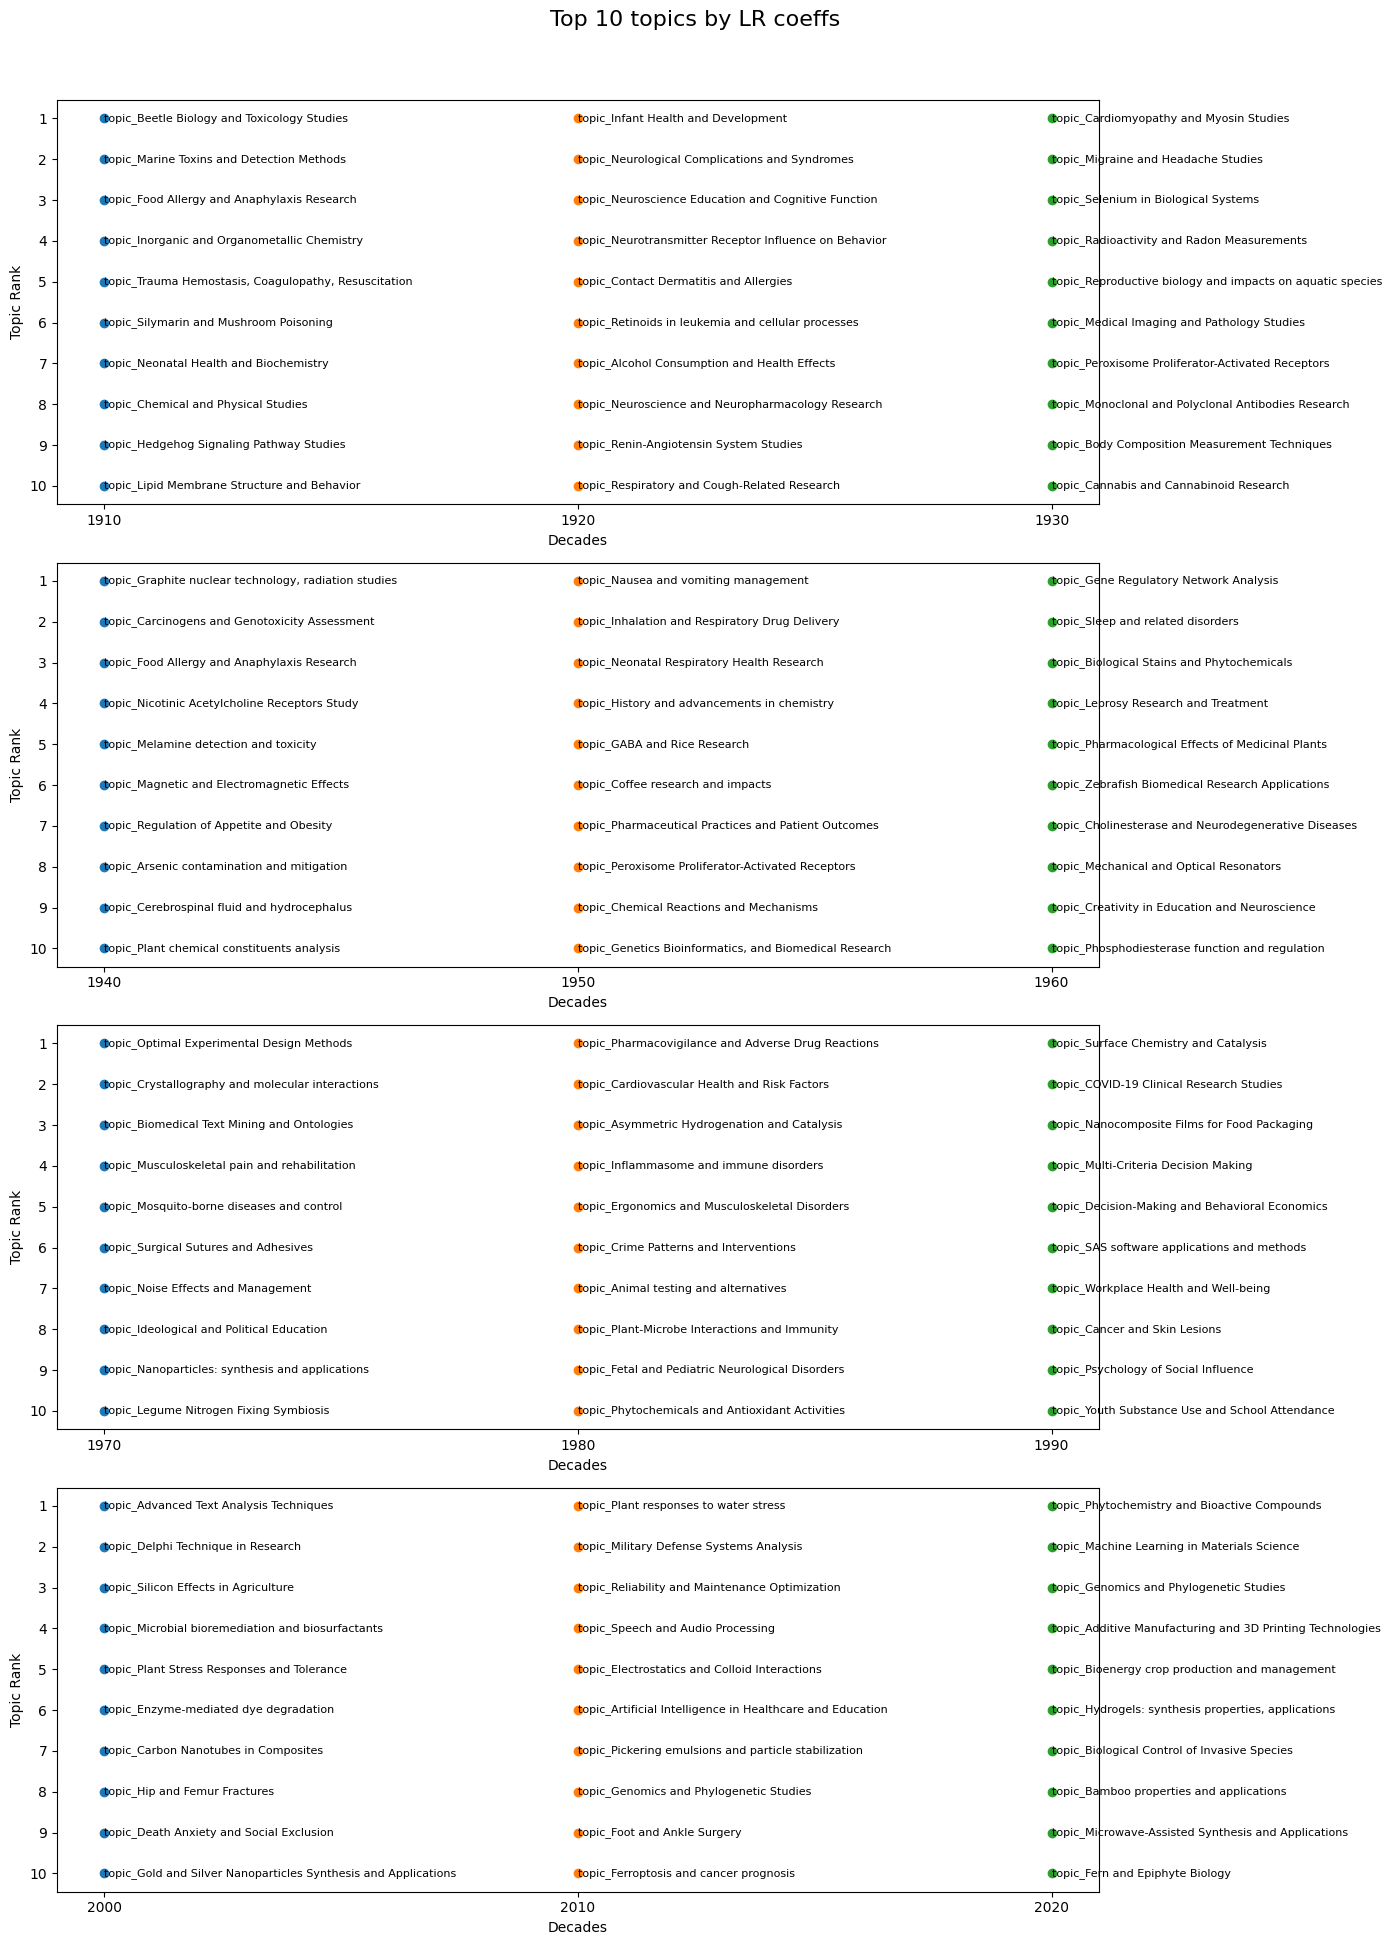

In [82]:
import matplotlib.pyplot as plt

# Suppose que ton dictionnaire s'appelle all_top10
decades = list(all_top10.keys())
n_decades = len(decades)

# On crée 4 sous-graphes (4 lignes)
fig, axes = plt.subplots(4, 1, figsize=(14, 20), sharex=False)
fig.suptitle("Top 10 topics by LR coeffs", fontsize=16, y=0.97)

# Diviser les décennies en 4 groupes de ~3
chunk_size = 3
for i, ax in enumerate(axes):
    start = i * chunk_size
    end = min(start + chunk_size, n_decades)
    subset = decades[start:end]

    for j, decade in enumerate(subset):
        topics = list(all_top10[decade].keys())
        y_positions = range(10)
        x_offset = j * 0.5  # petit décalage pour pas que tout se chevauche
        ax.scatter([decade]*10, y_positions)
        for y, topic in zip(y_positions, topics):
               ax.text(decade, y, topic, fontsize=8, ha='left', va='center')
            
    ax.invert_yaxis()
    ax.set_xlabel("Decades")
    ax.set_yticks(range(10))
    ax.set_yticklabels([f"{i+1}" for i in range(10)])
    ax.set_ylabel("Topic Rank")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


summuary - Plot top 5 - mix columns - exclude meta/review